In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
m1 = 1
m2 = 333000
x1_0 = 0
y1_0 = 0
x2_0 = 1
y2_0 = 0
vx1_0 = 0
vy1_0 = np.sqrt(m2)
vx2_0 = 0
vy2_0 = 0

In [3]:
def dSdt(S, t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return [
        vx1,
        vy1,
        vx2,
        vy2,
        m2 / r12 ** 3 * (x2-x1),
        m2 / r12 ** 3 * (y2-y1),
        m1 / r12 ** 3 * (x1-x2),
        m1 / r12 ** 3 * (y1-y2)
    ]

In [4]:
t = np.linspace(0, 1, 10000)

In [5]:
sol = odeint(dSdt, [x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0], t=t)

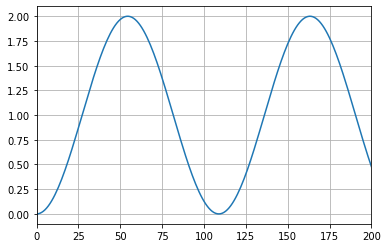

In [6]:
plt.plot(sol.T[0])
plt.xlim(0, 200)
plt.grid()

In [7]:
tt = 1/np.sqrt(6.67e-11*(5.97e24/(1.5e11)**3))
tt = tt/(60*60*24*365.25) * np.diff(t)[0]

In [8]:
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]

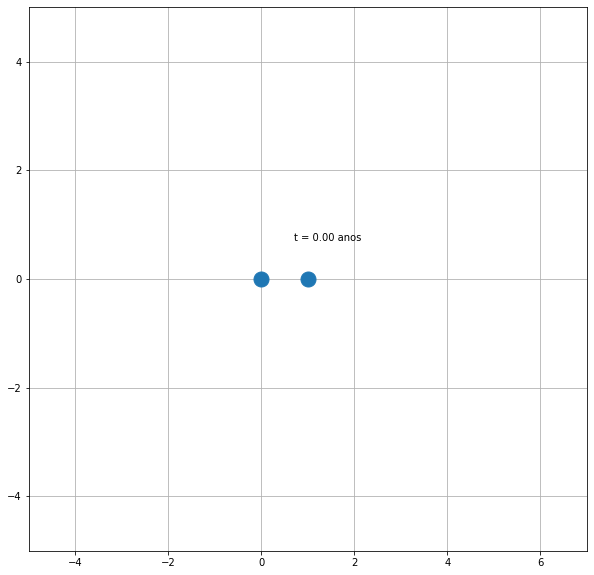

In [18]:
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text(f't = {i*tt:.2f} anos')
    
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.grid()
ln1, = plt.plot([], [], 'o', lw=3, markersize=15)
text = plt.text(0.7, 0.7, '')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 7)
ani = animation.FuncAnimation(fig, animate, frames=200, interval=50)
ani.save('plan.gif', writer='pillow', fps=20)
